In this part we will use Langchain framework that's will help use to use advanced techniques.
* LangChain is one of the earlier frame works that simplify working with LLMs.
* ther's other like:
  * DSPy
  * Haystack

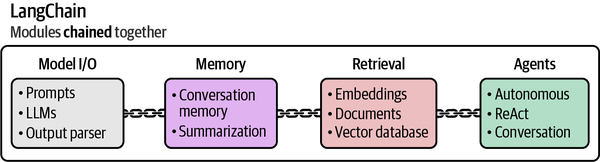

In [2]:
# show the version of cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [2]:
# install langchain
! pip install langchain langchain_community -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [1]:
# Install llama.cpp for cuda gpu
! pip install --no-cache-dir llama-cpp-python==0.2.77 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu122

Looking in indexes: https://pypi.org/simple, https://abetlen.github.io/llama-cpp-python/whl/cu122
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.7/315.7 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 149.4 MB/s eta 0:00:00


In [3]:
# download quantized model from hugginface
from huggingface_hub import hf_hub_download
model_path=hf_hub_download("microsoft/Phi-3-mini-4k-instruct-gguf",
                filename="Phi-3-mini-4k-instruct-fp16.gguf",
                local_dir='models/'
)
print(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Phi-3-mini-4k-instruct-fp16.gguf:   0%|          | 0.00/7.64G [00:00<?, ?B/s]

models/Phi-3-mini-4k-instruct-fp16.gguf


In [5]:
from langchain import LlamaCpp
llm=LlamaCpp(
    model_path="/content/models/Phi-3-mini-4k-instruct-fp16.gguf",
    n_gpu_layers=-1,
    max_tokens=500,
    n_ctx=2048,
    seed=42,
    verbose=False
)

In [6]:
llm.invoke("Hello") # we got no output

''

# Chains: Extending The capabilities of LLMs

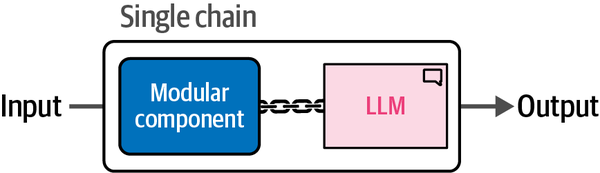

### Prompt Template

In [7]:
from langchain import PromptTemplate
template="""<s><|user|>
{input_prompt}<|end|>
<|assistant|>"""
prompt=PromptTemplate(
    template=template,
    input_variables=["input_prompt"]
)

In [8]:
basic_chain=prompt|llm

In [10]:
output=basic_chain.invoke(
    {
        "input_prompt":"hi my name abdeljail."
    }
)
print(output)

 Hello Abdeljalil! How can I assist you today? Whether it's information, guidance on a certain topic, or just to chat, feel free to share what you need help with. Remember, I'm here to provide support and answer your questions to the best of my ability.


### Multiple prompts

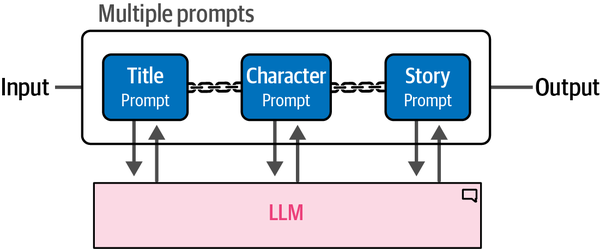

In [11]:
from langchain import LLMChain

In [12]:
# template to generate a title of story from summary
template="""<s><|user|>create a title story about {summary}. Only return the title<|end|>
<|assisstant|>"""

In [13]:
title_prompt=PromptTemplate(
    template=template,
    input_variables=["summary"],
)

In [14]:
title=LLMChain(
    llm=llm,
    prompt=title_prompt,
    output_key="title"
)

<ipython-input-14-41e660024d49>:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  title=LLMChain(


In [15]:
title.invoke({"summary":"a student that lost his homework"})

{'summary': 'a student that lost his homework',
 'title': ' "Lost Assignments: A Student\'s Dilemma"'}

In [16]:
# template to generate the characteristiques of a story
template="""<s><|user|>
Describe the main character of story about {summary} with the title {title}. Use only two sentences<|end|>
<|assisstant|>
"""

In [18]:
character_prompt=PromptTemplate(
    template=template,
    input_variables=["summary","title"]
    )

In [19]:
character=LLMChain(
    llm=llm,
    prompt=character_prompt,
    output_key="character"
)

In [ ]:
# template to create the story
template="""<s><|user|> Create a story about {summary} with title {title}. The main character is:
{character}. Only return the story and it cannot be longer than one paragraph.<|end|>
<|assisstant|>
"""

In [ ]:
story_prompt=PromptTemplate(
    template=template,
    input_variables=["summary","title","caracter"]
)

In [ ]:
story=